## **Lets first import all necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import re
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
import pandas.core.algorithms as algos
import scipy.stats.stats as stats
import traceback
import string
import mlxtend

In [2]:
pd.set_option('display.max_columns', None)  

In [3]:
pd.set_option('display.max_colwidth', None)

## **Loading the dataset**

In [4]:
train = pd.read_csv('./dataset/credit_risk.csv')
train.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [5]:
train["credit_card_default"].value_counts()
train["credit_card_default"].value_counts(normalize=True)

0    0.918797
1    0.081203
Name: credit_card_default, dtype: float64

In [6]:
df = train.sample(n = 30000, random_state = 42, replace = False)
df

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
34126,CST_163708,Wachtel,50,F,N,Y,0.0,269502.14,4181.0,Unknown,1.0,0.0,17440.44,36017.45,23,807.0,0,0,0
44609,CST_131305,Deepa,29,F,N,Y,0.0,115795.25,365250.0,Unknown,2.0,0.0,28962.21,21781.38,60,858.0,0,0,0
44264,CST_131350,Jason,39,F,N,Y,0.0,113477.67,365241.0,Unknown,2.0,0.0,27463.96,27485.15,81,667.0,0,0,1
33556,CST_106655,Gilbert Kreijger,35,F,Y,Y,1.0,215555.19,1882.0,Managers,3.0,0.0,47863.75,25054.25,32,690.0,0,0,0
28050,CST_154013,Slater,53,M,Y,Y,0.0,185082.22,365244.0,Unknown,2.0,0.0,47185.73,65186.23,65,721.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37523,CST_113336,Leika Kihara,26,F,N,Y,0.0,95125.83,365244.0,Unknown,1.0,0.0,18408.08,26632.82,2,790.0,0,0,0
36228,CST_151817,Dixon,31,F,N,N,0.0,119277.91,891.0,Laborers,2.0,0.0,18243.68,16150.12,18,791.0,0,0,0
32772,CST_107659,P.J. Huffstutter,50,F,N,N,0.0,214846.93,1740.0,Sales staff,2.0,0.0,16482.42,27253.76,16,709.0,0,0,0
9762,CST_141352,an,25,M,N,Y,0.0,175005.61,653.0,Laborers,2.0,0.0,19366.06,35727.99,9,691.0,0,0,0


## **Performing EDA**

In [7]:
print(df.shape)

(30000, 19)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 34126 to 33325
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              30000 non-null  object 
 1   name                     30000 non-null  object 
 2   age                      30000 non-null  int64  
 3   gender                   30000 non-null  object 
 4   owns_car                 29631 non-null  object 
 5   owns_house               30000 non-null  object 
 6   no_of_children           29498 non-null  float64
 7   net_yearly_income        30000 non-null  float64
 8   no_of_days_employed      29685 non-null  float64
 9   occupation_type          30000 non-null  object 
 10  total_family_members     29944 non-null  float64
 11  migrant_worker           29947 non-null  float64
 12  yearly_debt_payments     29938 non-null  float64
 13  credit_limit             30000 non-null  float64
 14  credit_limit_used(

## **Segregating Numerical and Categorical Features**

In [9]:
cat_feats = [col for col in df.columns if df[col].dtypes == "object"]
num_feats =  [col for col in df.columns if df[col].dtypes != "object"]

print("no of cat feats: ", len(cat_feats))
print("no of num feats: ", len(num_feats))

no of cat feats:  6
no of num feats:  13


In [10]:
cat_feats

['customer_id', 'name', 'gender', 'owns_car', 'owns_house', 'occupation_type']

In [11]:
num_feats

['age',
 'no_of_children',
 'net_yearly_income',
 'no_of_days_employed',
 'total_family_members',
 'migrant_worker',
 'yearly_debt_payments',
 'credit_limit',
 'credit_limit_used(%)',
 'credit_score',
 'prev_defaults',
 'default_in_last_6months',
 'credit_card_default']

In [12]:
df.duplicated().sum()

0

## **Checking null values for categorical features**

In [13]:
df.isnull().sum().sort_values(ascending=False)

no_of_children             502
owns_car                   369
no_of_days_employed        315
yearly_debt_payments        62
total_family_members        56
migrant_worker              53
credit_score                 6
customer_id                  0
default_in_last_6months      0
prev_defaults                0
credit_limit_used(%)         0
credit_limit                 0
occupation_type              0
name                         0
net_yearly_income            0
owns_house                   0
gender                       0
age                          0
credit_card_default          0
dtype: int64

In [14]:
df["credit_card_default"].value_counts()

0    27537
1     2463
Name: credit_card_default, dtype: int64

In [15]:
df["credit_card_default"].value_counts(normalize=True)

0    0.9179
1    0.0821
Name: credit_card_default, dtype: float64

In [16]:
df[cat_feats].isnull().sum()

customer_id          0
name                 0
gender               0
owns_car           369
owns_house           0
occupation_type      0
dtype: int64

In [17]:
for i in cat_feats:
    print("Column Name:",i)
    print(df[i].value_counts(normalize=True))
    print("\n")

Column Name: customer_id
CST_163708    0.000033
CST_131964    0.000033
CST_162494    0.000033
CST_138114    0.000033
CST_102185    0.000033
                ...   
CST_148239    0.000033
CST_130171    0.000033
CST_132131    0.000033
CST_112807    0.000033
CST_129867    0.000033
Name: customer_id, Length: 30000, dtype: float64


Column Name: name
Jonathan            0.004367
Jonathan Stempel    0.004133
Jessica             0.003600
Sarah               0.003533
David               0.003467
                      ...   
Baker Jonathan      0.000033
Joshua Franklin     0.000033
Fathiya Dahrul      0.000033
Becker              0.000033
Olga Dzyubenko      0.000033
Name: name, Length: 3514, dtype: float64


Column Name: gender
F    0.6577
M    0.3423
Name: gender, dtype: float64


Column Name: owns_car
N    0.660862
Y    0.339138
Name: owns_car, dtype: float64


Column Name: owns_house
Y    0.6962
N    0.3038
Name: owns_house, dtype: float64


Column Name: occupation_type
Unknown              

As there are missing values mostly less than 2%, so, let us impute all missing values with statistical way.
That is, FillNA by MODE if it is categorical variable and FillNA by MEDIAN if it is numerical variable

## **Removing null values for feature: Owns car**

In [18]:
# fill owns_car with mode of the data
df['owns_car'].fillna(df['owns_car'].mode()[0], inplace=True)

In [19]:
df["owns_car"].value_counts(normalize=True)

N    0.665033
Y    0.334967
Name: owns_car, dtype: float64

In [20]:
df[cat_feats].isnull().sum()

customer_id        0
name               0
gender             0
owns_car           0
owns_house         0
occupation_type    0
dtype: int64

## **Checking null values for Numerical Features**

In [21]:
df[num_feats].isnull().sum().sort_values(ascending=False)

no_of_children             502
no_of_days_employed        315
yearly_debt_payments        62
total_family_members        56
migrant_worker              53
credit_score                 6
age                          0
net_yearly_income            0
credit_limit                 0
credit_limit_used(%)         0
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64

### **no_of_days_employed**

In [22]:
occp_days_employed = df.groupby(by='occupation_type')['no_of_days_employed'].median()

for i in occp_days_employed.index:
    df['no_of_days_employed'] = np.where((df['no_of_days_employed'].isna()) & (df['occupation_type'] == i), occp_days_employed[i], df['no_of_days_employed'])

In [23]:
df.no_of_days_employed.isna().sum()

0

### **yearly_debt_payments**

In [24]:
yearDebt_credit = df.groupby(by='credit_card_default')['yearly_debt_payments'].median()
for i in yearDebt_credit.index:
    df['yearly_debt_payments'] = np.where((df['yearly_debt_payments'].isna()) & (df['credit_card_default'] == i), yearDebt_credit[i], df['yearly_debt_payments'])

In [25]:
df['yearly_debt_payments'].isna().sum()

0

In [26]:
df[num_feats].isnull().sum().sort_values(ascending = False)

no_of_children             502
total_family_members        56
migrant_worker              53
credit_score                 6
age                          0
net_yearly_income            0
no_of_days_employed          0
yearly_debt_payments         0
credit_limit                 0
credit_limit_used(%)         0
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64

### **migrant_worker**

In [27]:
df['migrant_worker'].mode()

0    0.0
Name: migrant_worker, dtype: float64

In [28]:
# imputing with mode of the data
df['migrant_worker'].fillna(df['migrant_worker'].mode()[0], inplace=True)

# check null values count
df['migrant_worker'].isna().sum()

0

### **total_family_members**

In [29]:
# imputing with mode of the data
df['total_family_members'].fillna(df['total_family_members'].mode()[0], inplace=True)

# check null values count
df['total_family_members'].isna().sum()

0

In [30]:
df[num_feats].isnull().sum().sort_values(ascending = False)

no_of_children             502
credit_score                 6
age                          0
net_yearly_income            0
no_of_days_employed          0
total_family_members         0
migrant_worker               0
yearly_debt_payments         0
credit_limit                 0
credit_limit_used(%)         0
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64

### **no_of_children**

In [31]:
# fill no_of_children with mode of the data
df['no_of_children'].fillna(df['no_of_children'].mode()[0], inplace=True)

### **credit_score**

In [32]:
cred_score = df.groupby(by='credit_card_default')['credit_score'].median()

for i in cred_score.index:
    df['credit_score'] = np.where((df['credit_score'].isna()) & (df['credit_card_default'] == i), cred_score[i], df['credit_score'])

df['credit_score'].isna().sum()

0

In [33]:
df[num_feats].isnull().sum().sort_values(ascending = False)

age                        0
no_of_children             0
net_yearly_income          0
no_of_days_employed        0
total_family_members       0
migrant_worker             0
yearly_debt_payments       0
credit_limit               0
credit_limit_used(%)       0
credit_score               0
prev_defaults              0
default_in_last_6months    0
credit_card_default        0
dtype: int64

In [34]:
df.isnull().sum()

customer_id                0
name                       0
age                        0
gender                     0
owns_car                   0
owns_house                 0
no_of_children             0
net_yearly_income          0
no_of_days_employed        0
occupation_type            0
total_family_members       0
migrant_worker             0
yearly_debt_payments       0
credit_limit               0
credit_limit_used(%)       0
credit_score               0
prev_defaults              0
default_in_last_6months    0
credit_card_default        0
dtype: int64

This shows that we have successfully cleaned the dataset by replacing all the null values in the dataset

## **Performing concentrated EDA**

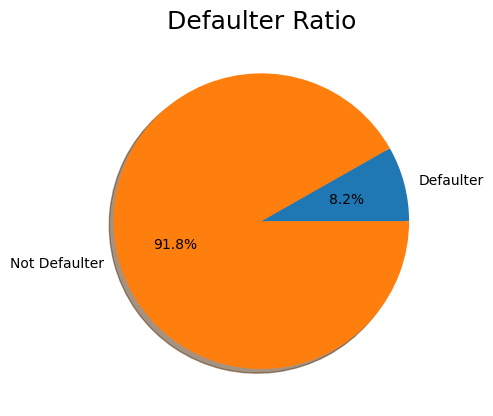

In [35]:
total_default_values = df.credit_card_default.value_counts(ascending=True).values

plt.figure()
plt.pie(total_default_values, labels=['Defaulter', 'Not Defaulter'], autopct='%1.1f%%', shadow=True)
plt.title('Defaulter Ratio', fontsize=18)
plt.show()

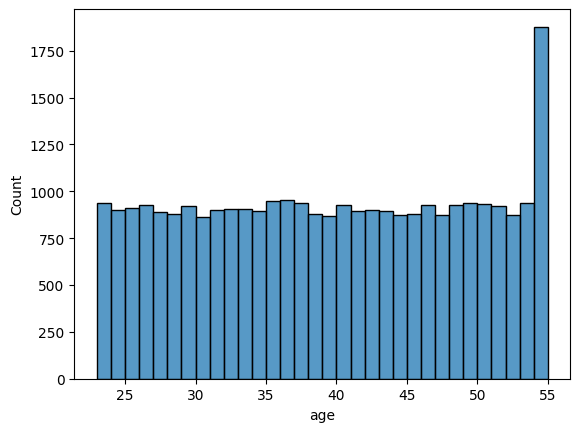

In [36]:
plt.figure()
sns.histplot(df['age'])
plt.show()

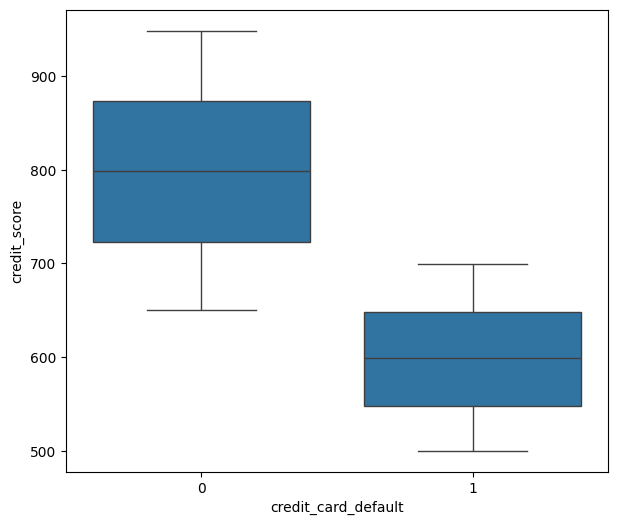

In [37]:
plt.figure(figsize=[7,6])
sns.boxplot(x=df['credit_card_default'], y=df['credit_score'])
plt.show()

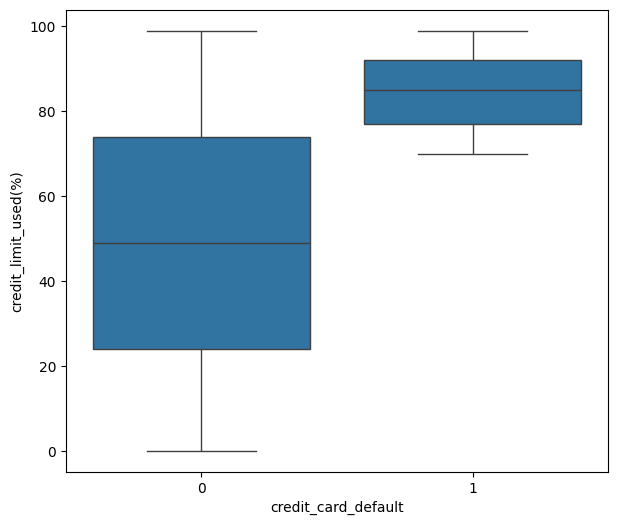

In [38]:
plt.figure(figsize=[7,6])
sns.boxplot(x=df['credit_card_default'], y=df['credit_limit_used(%)'])
plt.show()

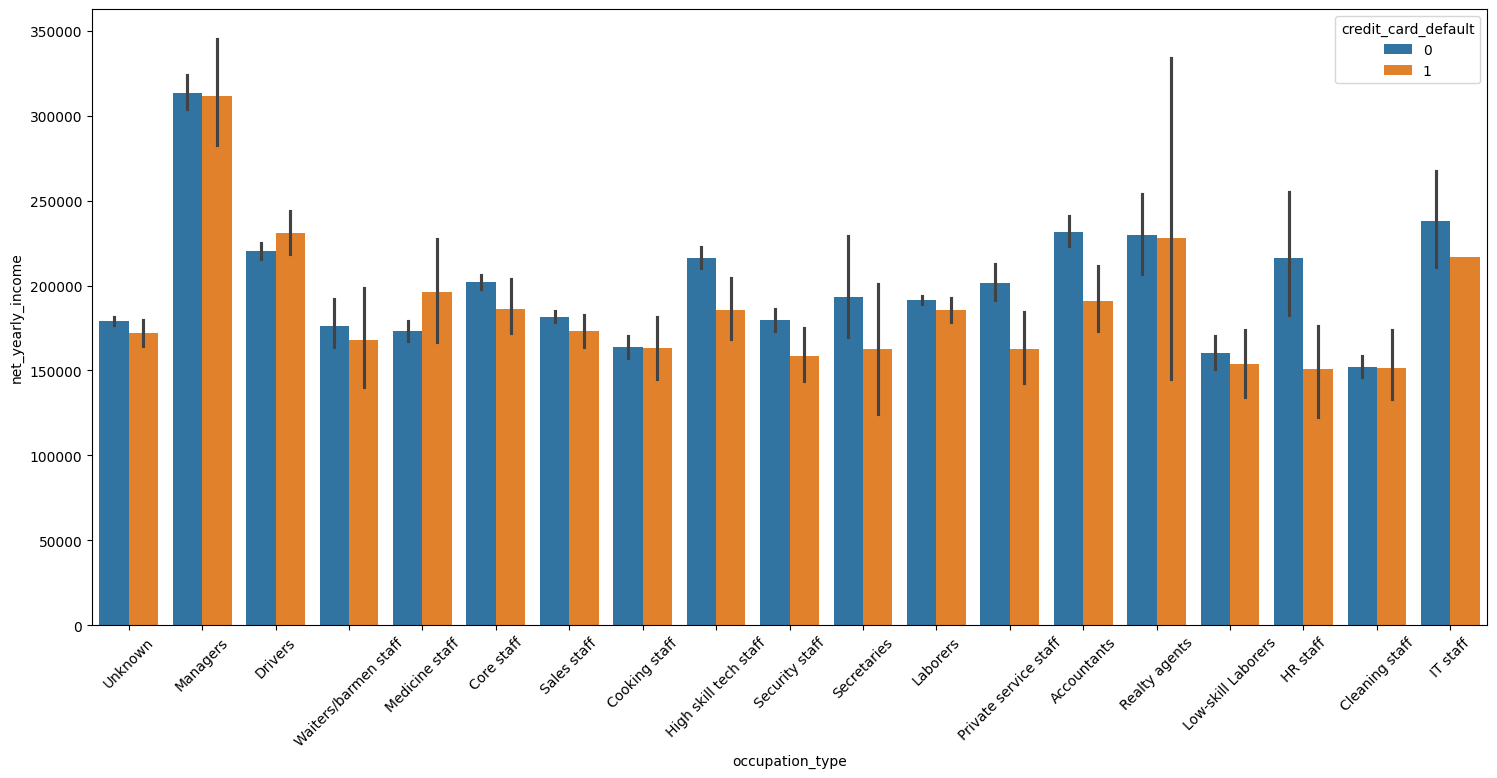

In [39]:
plt.figure(figsize=[18,8])
sns.barplot(x=df['occupation_type'], y=df['net_yearly_income'], hue=df['credit_card_default'])
plt.xticks(rotation=45)
plt.show()

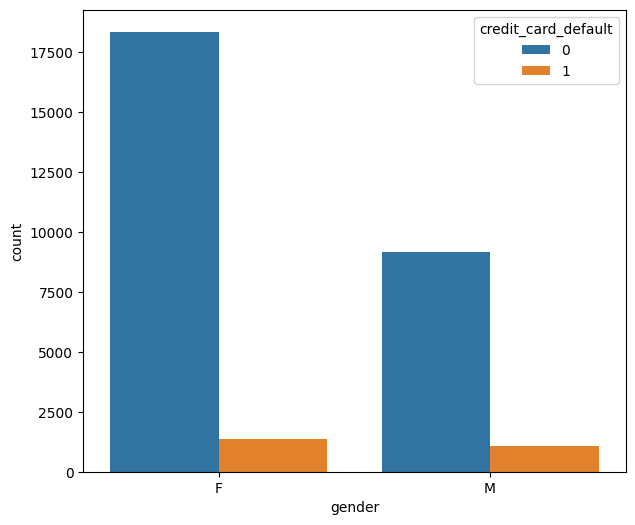

In [40]:
plt.figure(figsize=[7,6])
sns.countplot(x=df['gender'], hue=df['credit_card_default'])
plt.show()

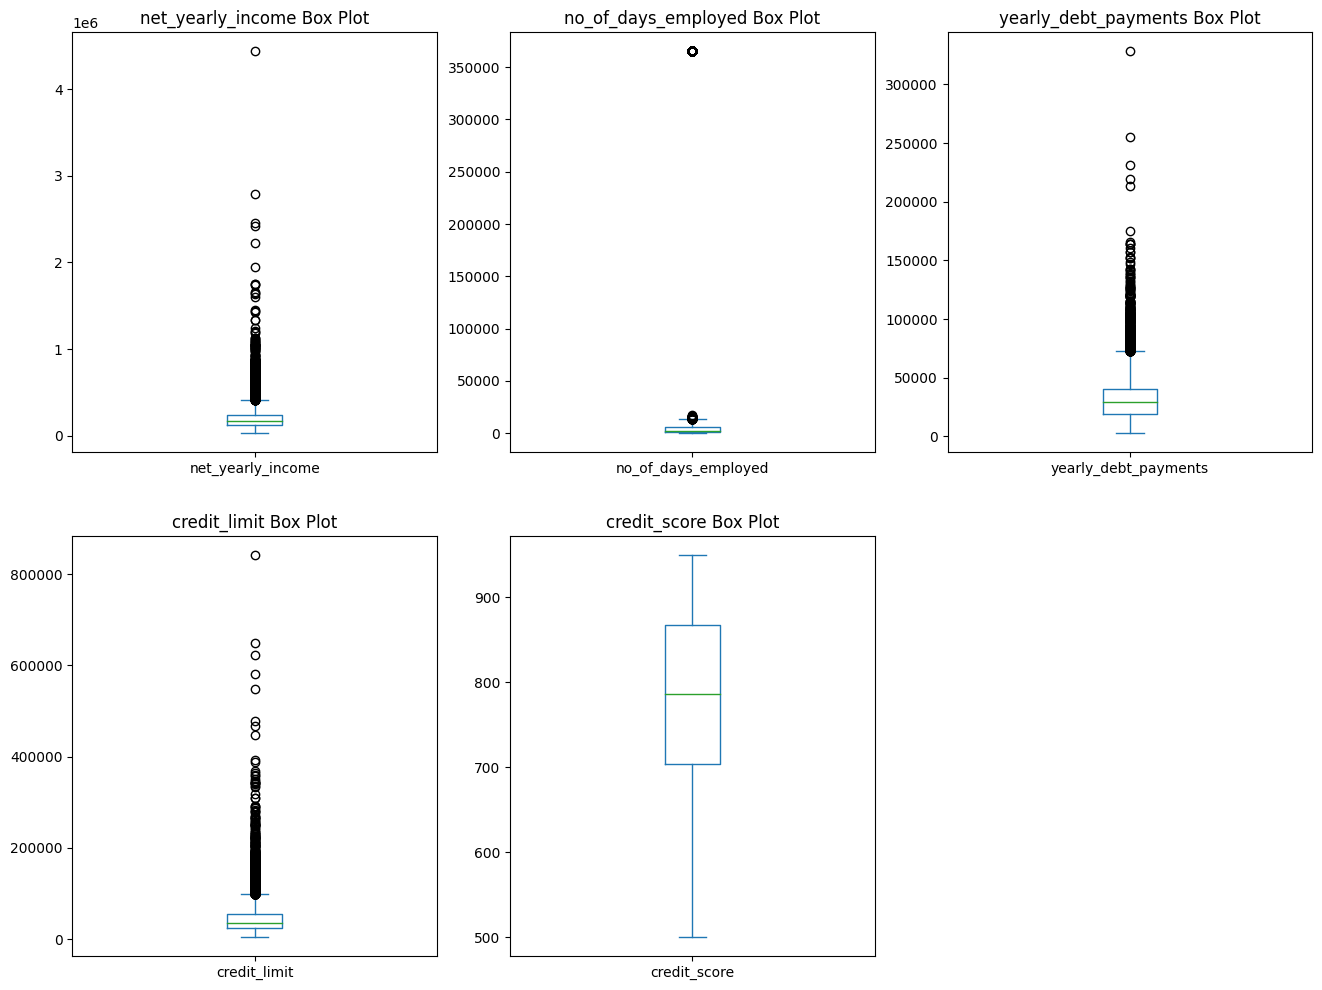

In [41]:
plt.figure(figsize=[16, 12])
plt.subplot(2,3,1)
df['net_yearly_income'].plot.box()
plt.title('net_yearly_income Box Plot')

plt.subplot(2,3,2)
df['no_of_days_employed'].plot.box()
plt.title('no_of_days_employed Box Plot')

plt.subplot(2,3,3)
df['yearly_debt_payments'].plot.box()
plt.title('yearly_debt_payments Box Plot')

plt.subplot(2,3,4)
df['credit_limit'].plot.box()
plt.title('credit_limit Box Plot')

plt.subplot(2,3,5)
df['credit_score'].plot.box()
plt.title('credit_score Box Plot')
plt.show()

# **Data Processing**

### Drop columns which have IV < 0.02

In [42]:
max_bin = 20
force_bin = 3

def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = notmiss.X.quantile(np.linspace(0, 1, n)).values
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(pd.Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv) 

In [43]:
final_iv, IV = data_vars(df.drop(columns =["customer_id", "name", 'credit_card_default']), df["credit_card_default"])

C:\Users\vedan\AppData\Local\Temp\ipykernel_5356\1504577962.py:14: DeprecationWarning: Please use `spearmanr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
C:\Users\vedan\AppData\Local\Temp\ipykernel_5356\1504577962.py:14: DeprecationWarning: Please use `spearmanr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
C:\Users\vedan\AppData\Local\Temp\ipykernel_5356\1504577962.py:14: DeprecationWarning: Please use `spearmanr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
C:\Users\vedan\AppData\Local\Temp\ipykernel_5356\1504577962.py:14: DeprecationWarning: Please use `spearmanr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
C:\Users\vedan\AppData\L

In [44]:
final_iv

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,age,23,39,15426,1268,0.082199,14158,0.917801,0.514819,0.514145,0.001311,0.000002
1,age,40,55,14574,1195,0.081995,13379,0.918005,0.485181,0.485855,-0.001390,0.000002
2,gender,F,F,19731,1378,0.069839,18353,0.930161,0.559480,0.666485,-0.175009,0.048503
3,gender,M,M,10269,1085,0.105658,9184,0.894342,0.440520,0.333515,0.278268,0.048503
4,owns_car,N,N,19951,1709,0.085660,18242,0.914340,0.693869,0.662454,0.046332,0.004524
5,owns_car,Y,Y,10049,754,0.075032,9295,0.924968,0.306131,0.337546,-0.097689,0.004524
6,owns_house,N,N,9114,757,0.083059,8357,0.916941,0.307349,0.303483,0.012659,0.000070
7,owns_house,Y,Y,20886,1706,0.081682,19180,0.918318,0.692651,0.696517,-0.005566,0.000070
8,no_of_children,0.0,1.0,27010,2196,0.081303,24814,0.918697,0.891596,0.901115,-0.010620,0.000976
9,no_of_children,2.0,9.0,2990,267,0.089298,2723,0.910702,0.108404,0.098885,0.091910,0.000976


In [45]:
IV.sort_values('IV')

,VAR_NAME,IV
0,age,0.000002
12,owns_house,0.000070
15,yearly_debt_payments,0.000080
1,credit_limit,0.000470
8,no_of_children,0.000976
14,total_family_members,0.002461
7,net_yearly_income,0.003464
11,owns_car,0.004524
13,prev_defaults,0.006260
6,migrant_worker,0.012561


In [46]:
IV.sort_values('IV', ascending=True).head(10)

,VAR_NAME,IV
0,age,0.000002
12,owns_house,0.000070
15,yearly_debt_payments,0.000080
1,credit_limit,0.000470
8,no_of_children,0.000976
14,total_family_members,0.002461
7,net_yearly_income,0.003464
11,owns_car,0.004524
13,prev_defaults,0.006260
6,migrant_worker,0.012561


In [47]:
IV.sort_values('IV', ascending=True).head(10)["VAR_NAME"].values

array(['age', 'owns_house', 'yearly_debt_payments', 'credit_limit',
       'no_of_children', 'total_family_members', 'net_yearly_income',
       'owns_car', 'prev_defaults', 'migrant_worker'], dtype=object)

**We will drop some low (< 0.02) IV columns**

In [48]:
low_IV_cols =  ['age', 'owns_house', 'yearly_debt_payments', 'credit_limit',
      'no_of_children', 'total_family_members', 'net_yearly_income',
       'owns_car', 'prev_defaults', 'migrant_worker']

## **WOE binning**

[INFO] creating woe binning ...
Binning on 30000 rows and 17 columns in 00:00:15


{'owns_house': <Figure size 640x480 with 2 Axes>,
 'yearly_debt_payments': <Figure size 640x480 with 2 Axes>,
 'total_family_members': <Figure size 640x480 with 2 Axes>,
 'owns_car': <Figure size 640x480 with 2 Axes>,
 'no_of_children': <Figure size 640x480 with 2 Axes>,
 'credit_score': <Figure size 640x480 with 2 Axes>,
 'migrant_worker': <Figure size 640x480 with 2 Axes>,
 'gender': <Figure size 640x480 with 2 Axes>,
 'credit_limit_used(%)': <Figure size 640x480 with 2 Axes>,
 'net_yearly_income': <Figure size 640x480 with 2 Axes>,
 'occupation_type': <Figure size 640x480 with 2 Axes>,
 'prev_defaults': <Figure size 640x480 with 2 Axes>,
 'no_of_days_employed': <Figure size 640x480 with 2 Axes>,
 'credit_limit': <Figure size 640x480 with 2 Axes>,
 'age': <Figure size 640x480 with 2 Axes>,
 'default_in_last_6months': <Figure size 640x480 with 2 Axes>}

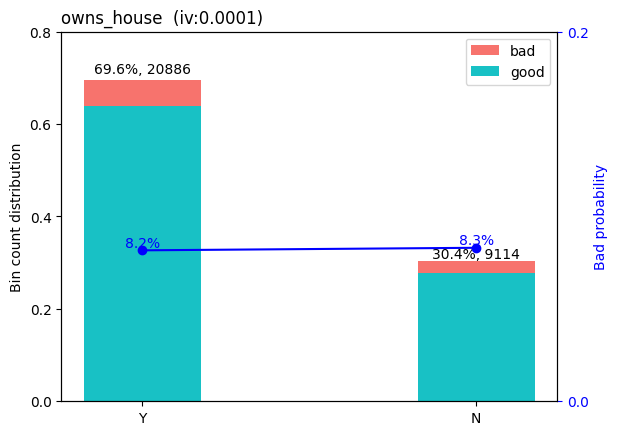

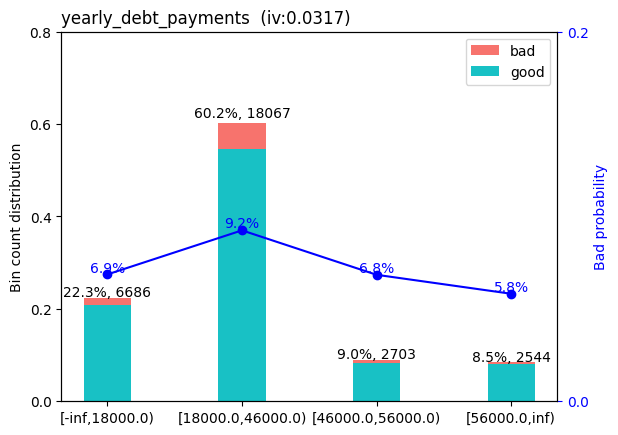

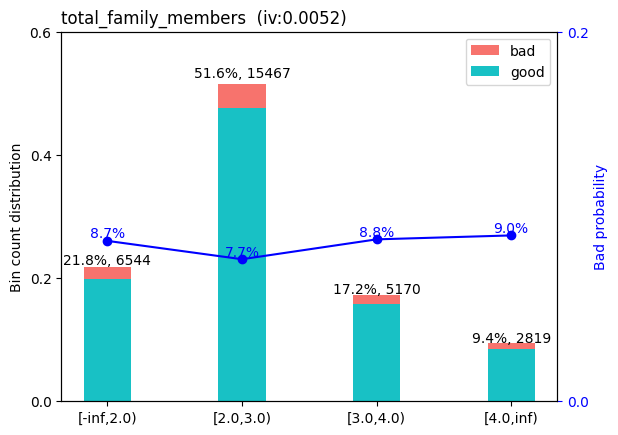

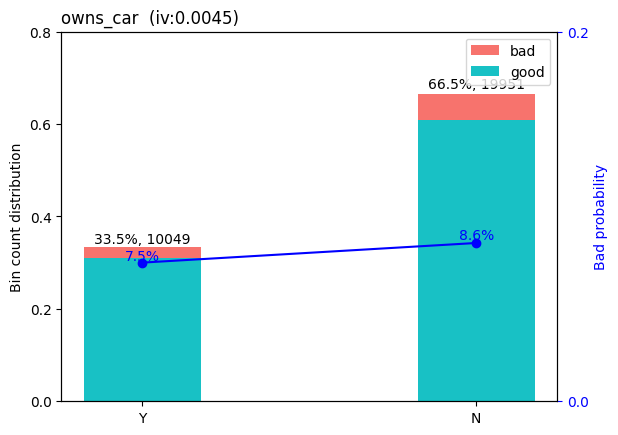

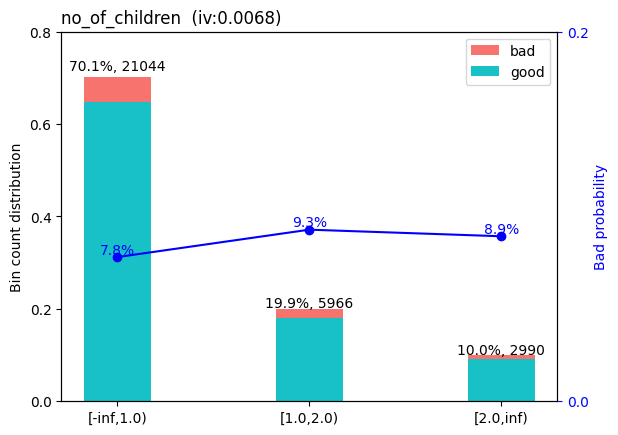

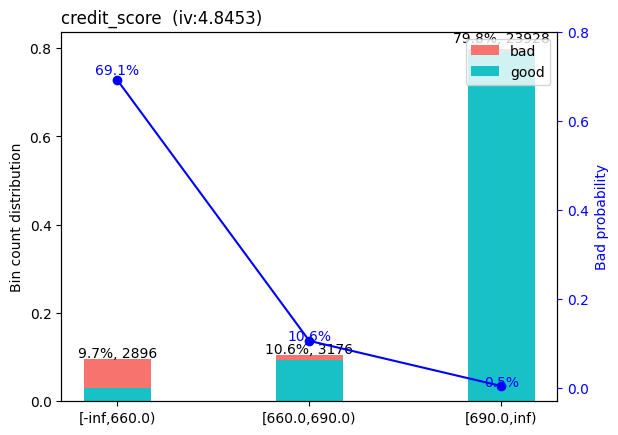

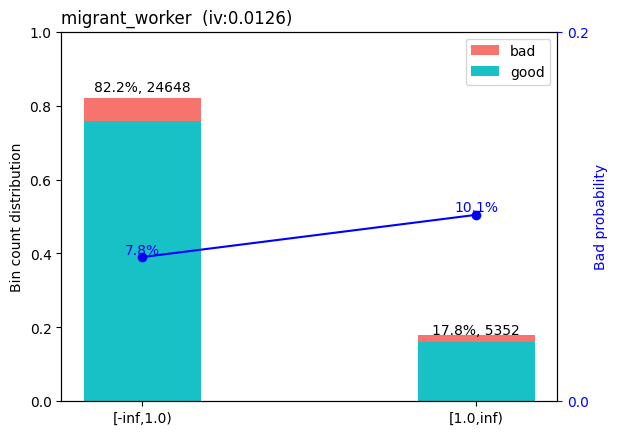

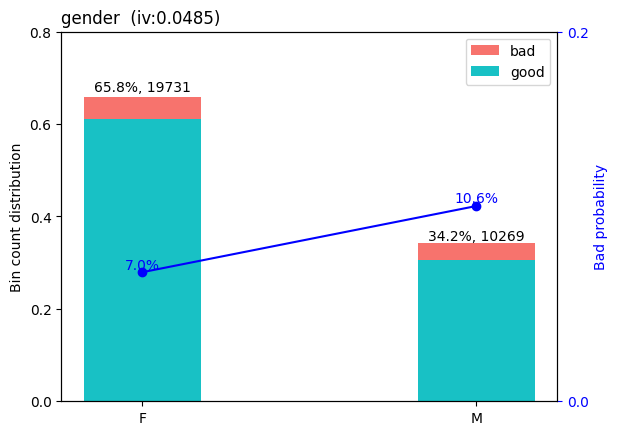

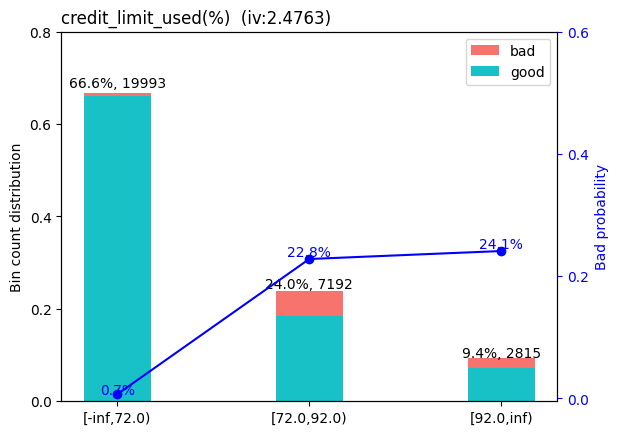

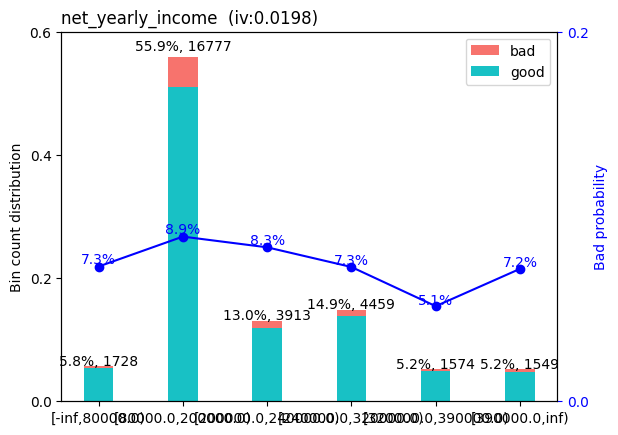

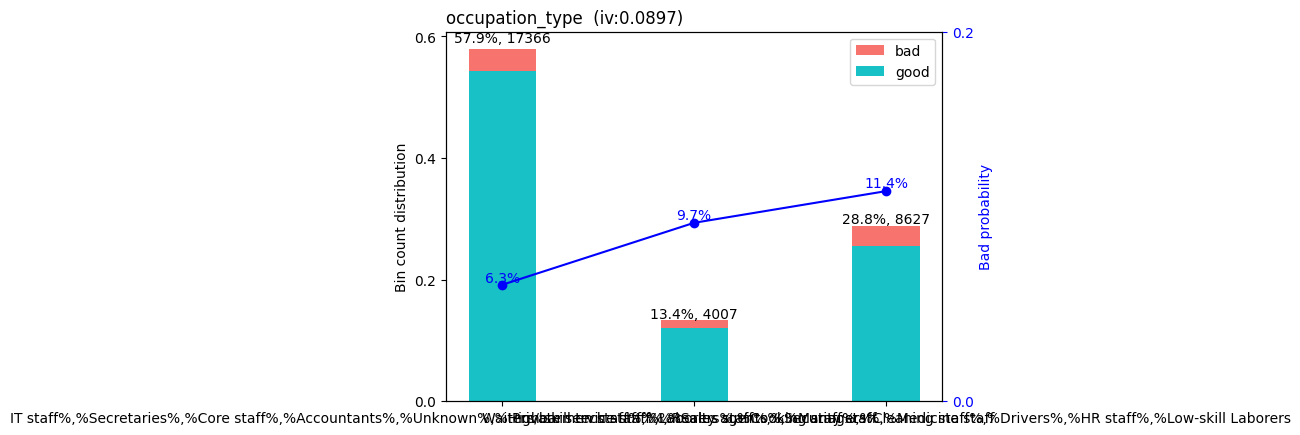

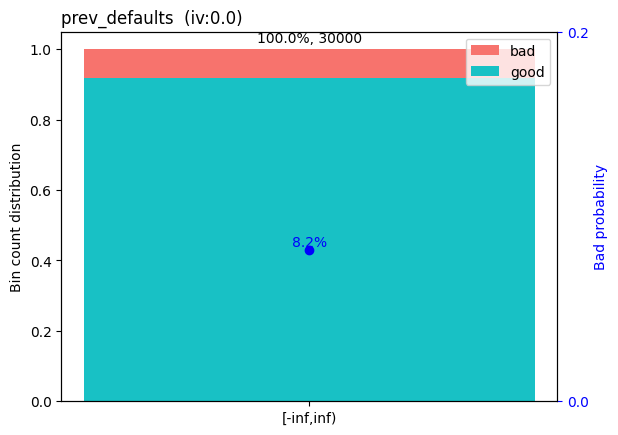

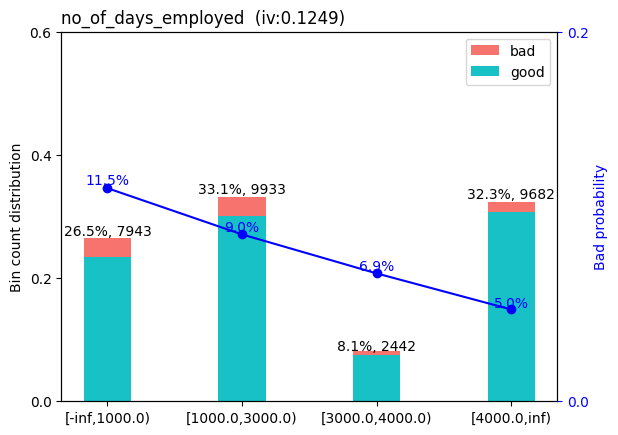

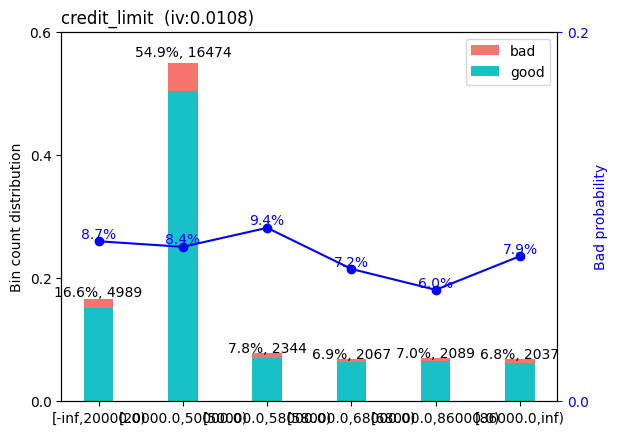

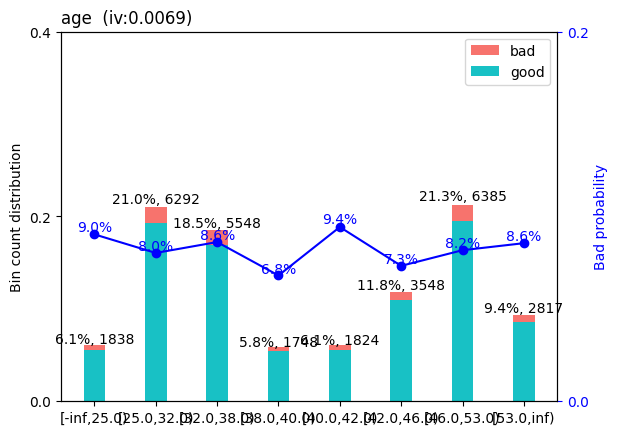

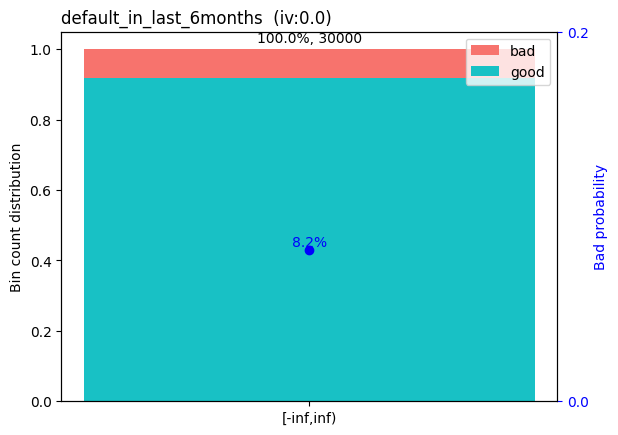

In [50]:
# woe binning ------
import scorecardpy as sc
bins = sc.woebin(df.drop(columns = ["customer_id", "name"]), y="credit_card_default")
sc.woebin_plot(bins)

In [51]:
train_woe = sc.woebin_ply(df, bins)
train_woe.drop(columns = ["customer_id", "name"], inplace = True)
train_woe.head(10)

[INFO] converting into woe values ...


,credit_card_default,no_of_days_employed_woe,owns_house_woe,yearly_debt_payments_woe,credit_limit_woe,total_family_members_woe,owns_car_woe,age_woe,no_of_children_woe,credit_score_woe,migrant_worker_woe,default_in_last_6months_woe,gender_woe,credit_limit_used(%)_woe,net_yearly_income_woe,occupation_type_woe,prev_defaults_woe
34126,0,-0.537050,-0.005566,-0.193449,0.019562,0.060765,0.046332,-0.004599,-0.055311,-2.851316,-0.055429,0.0,-0.175009,-2.518964,-0.132349,-0.284480,0.0
44609,0,-0.537050,-0.005566,0.130535,0.019562,-0.071457,0.046332,-0.024660,-0.055311,-2.851316,-0.055429,0.0,-0.175009,-2.518964,0.089601,-0.284480,0.0
44264,1,-0.537050,-0.005566,0.130535,0.019562,-0.071457,0.046332,-0.202448,-0.055311,0.286341,-0.055429,0.0,-0.175009,1.195478,0.089601,-0.284480,0.0
33556,0,0.104234,-0.005566,-0.196714,0.019562,0.071114,-0.097689,0.052665,0.134941,-2.851316,-0.055429,0.0,-0.175009,-2.518964,0.015976,-0.284480,0.0
28050,0,-0.537050,-0.005566,-0.196714,-0.148197,-0.071457,-0.097689,0.044954,-0.055311,-2.851316,-0.055429,0.0,0.278268,-2.518964,0.089601,-0.284480,0.0
4448,0,0.104234,-0.005566,-0.193449,0.058156,0.097436,0.046332,-0.202448,0.091910,-2.851316,-0.055429,0.0,0.278268,-2.518964,0.089601,0.360785,0.0
15054,0,0.104234,0.012659,-0.196714,-0.148197,0.060765,0.046332,-0.024660,-0.055311,-2.851316,-0.055429,0.0,0.278268,-2.518964,0.089601,-0.284480,0.0
26095,0,0.104234,-0.005566,0.130535,0.058156,0.097436,-0.097689,0.052665,0.091910,-2.851316,-0.055429,0.0,-0.175009,-2.518964,0.089601,-0.284480,0.0
2593,0,0.376652,-0.005566,0.130535,0.058156,-0.071457,0.046332,0.052665,0.134941,-2.851316,-0.055429,0.0,-0.175009,-2.518964,0.089601,0.360785,0.0
297,0,-0.537050,-0.005566,0.130535,0.146722,0.071114,0.046332,-0.024660,0.134941,-2.851316,-0.055429,0.0,-0.175009,-2.518964,0.015976,-0.284480,0.0


In [52]:
# dropping text columns that aren't necessary like 'customer_id' and 'name'
old_df = df.copy()

df.drop(['customer_id', 'name'], axis=1, inplace=True)
df.drop(low_IV_cols, axis=1, inplace=True)
df.head()

,gender,no_of_days_employed,occupation_type,credit_limit_used(%),credit_score,default_in_last_6months,credit_card_default
34126,F,4181.0,Unknown,23,807.0,0,0
44609,F,365250.0,Unknown,60,858.0,0,0
44264,F,365241.0,Unknown,81,667.0,0,1
33556,F,1882.0,Managers,32,690.0,0,0
28050,M,365244.0,Unknown,65,721.0,0,0


## **Encoding**

In [53]:
df["gender"] = df["gender"].apply(lambda x : 1 if x == "F" else 0)

In [54]:
occupation_type_encoded_df = pd.get_dummies(df["occupation_type"], prefix= "occupation")
df = pd.concat([df, occupation_type_encoded_df], axis=1)
df.drop(columns=["occupation_type"], inplace=True)
df.head()

,gender,no_of_days_employed,credit_limit_used(%),credit_score,default_in_last_6months,credit_card_default,occupation_Accountants,occupation_Cleaning staff,occupation_Cooking staff,occupation_Core staff,occupation_Drivers,occupation_HR staff,occupation_High skill tech staff,occupation_IT staff,occupation_Laborers,occupation_Low-skill Laborers,occupation_Managers,occupation_Medicine staff,occupation_Private service staff,occupation_Realty agents,occupation_Sales staff,occupation_Secretaries,occupation_Security staff,occupation_Unknown,occupation_Waiters/barmen staff
34126,1,4181.0,23,807.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
44609,1,365250.0,60,858.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
44264,1,365241.0,81,667.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
33556,1,1882.0,32,690.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
28050,0,365244.0,65,721.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


## **Split dataset**

In [55]:
# split train-test data
X = df.drop(['credit_card_default'], axis=1)
y = df['credit_card_default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

print("X=",X_train.shape, X_test.shape)
print("y=",y_train.shape, y_test.shape)

X= (21000, 24) (9000, 24)
y= (21000,) (9000,)


In [56]:
X_train.head()

,gender,no_of_days_employed,credit_limit_used(%),credit_score,default_in_last_6months,occupation_Accountants,occupation_Cleaning staff,occupation_Cooking staff,occupation_Core staff,occupation_Drivers,occupation_HR staff,occupation_High skill tech staff,occupation_IT staff,occupation_Laborers,occupation_Low-skill Laborers,occupation_Managers,occupation_Medicine staff,occupation_Private service staff,occupation_Realty agents,occupation_Sales staff,occupation_Secretaries,occupation_Security staff,occupation_Unknown,occupation_Waiters/barmen staff
26658,1,365246.0,96,922.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5389,1,1206.0,16,711.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8704,1,4040.0,18,761.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
37747,0,96.0,51,854.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
27346,0,5326.0,92,700.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [57]:
y_train

26658    0
5389     0
8704     0
37747    0
27346    0
        ..
34093    0
823      0
32715    0
14006    0
21152    0
Name: credit_card_default, Length: 21000, dtype: int64

In [58]:
# WOE data
X_woe = train_woe.drop(['credit_card_default'], axis=1)
y_woe = train_woe['credit_card_default']

X_train_woe, X_test_woe, y_train_woe, y_test_woe = train_test_split(X_woe, y_woe, test_size=0.3, stratify=y_woe, random_state=42)

print("X=",X_train_woe.shape, X_test_woe.shape)
print("y=",y_train_woe.shape, y_test_woe.shape)

X= (21000, 16) (9000, 16)
y= (21000,) (9000,)


In [59]:
X_train_woe.head()

,no_of_days_employed_woe,owns_house_woe,yearly_debt_payments_woe,credit_limit_woe,total_family_members_woe,owns_car_woe,age_woe,no_of_children_woe,credit_score_woe,migrant_worker_woe,default_in_last_6months_woe,gender_woe,credit_limit_used(%)_woe,net_yearly_income_woe,occupation_type_woe,prev_defaults_woe
26658,-0.537050,-0.005566,-0.193449,0.146722,-0.071457,0.046332,0.052665,-0.055311,-2.851316,-0.055429,0.0,-0.175009,1.268081,0.015976,-0.284480,0.0
5389,0.104234,-0.005566,0.130535,0.058156,0.071114,0.046332,0.044954,0.134941,-2.851316,0.226851,0.0,-0.175009,-2.518964,-0.128576,0.360785,0.0
8704,-0.537050,-0.005566,-0.193449,0.019562,0.071114,0.046332,0.104362,0.134941,-2.851316,-0.055429,0.0,-0.175009,-2.518964,0.089601,-0.284480,0.0
37747,0.376652,-0.005566,-0.196714,0.019562,0.060765,-0.097689,-0.123203,-0.055311,-2.851316,-0.055429,0.0,0.278268,-2.518964,0.015976,-0.284480,0.0
27346,-0.537050,0.012659,0.130535,0.146722,-0.071457,0.046332,0.052665,-0.055311,-2.851316,-0.055429,0.0,0.278268,1.268081,0.089601,0.360785,0.0


In [60]:
y_woe

34126    0
44609    0
44264    1
33556    0
28050    0
        ..
37523    0
36228    0
32772    0
9762     0
33325    0
Name: credit_card_default, Length: 30000, dtype: int64

## **Scaling data**

In [61]:
# scaling the features to standardize
scaler = MinMaxScaler()

cols = X_train.columns
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

## **Data Imbalancing Handling**

In [62]:
# initialize SMOTE method
sm = SMOTE(random_state=42)
X_train,y_train = sm.fit_resample(X_train,y_train)

In [63]:
print("Dimension of X_train_sm Shape:", X_train.shape)
print("Dimension of y_train_sm Shape:", y_train.shape)

Dimension of X_train_sm Shape: (38552, 24)
Dimension of y_train_sm Shape: (38552,)


In [64]:
X_train = pd.DataFrame(data=X_train, columns=cols)
print("X_train.shape:",X_train.shape)
y_train = pd.Series(y_train)
print("y_train.shape:",y_train.shape)
X_train.head()

X_train.shape: (38552, 24)
y_train.shape: (38552,)


,gender,no_of_days_employed,credit_limit_used(%),credit_score,default_in_last_6months,occupation_Accountants,occupation_Cleaning staff,occupation_Cooking staff,occupation_Core staff,occupation_Drivers,occupation_HR staff,occupation_High skill tech staff,occupation_IT staff,occupation_Laborers,occupation_Low-skill Laborers,occupation_Managers,occupation_Medicine staff,occupation_Private service staff,occupation_Realty agents,occupation_Sales staff,occupation_Secretaries,occupation_Security staff,occupation_Unknown,occupation_Waiters/barmen staff
0,1.0,0.999984,0.969697,0.939866,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.003296,0.161616,0.469933,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.011055,0.181818,0.581292,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000257,0.515152,0.788419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.014576,0.929293,0.445434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
y_train.value_counts(normalize=True)

0    0.5
1    0.5
Name: credit_card_default, dtype: float64

In [66]:
def evaluation(model):
    # Initialize dictionary to store results
    metrics = {"Set": [], "Accuracy": [], "F1 Score": [], "RMSE": [], "ROC AUC": []}
    
    for dataset, (X, y, label) in zip(['TRAIN', 'TEST'], [(X_train, y_train, 'Train'), (X_test, y_test, 'Test')]):
        print(f"{'='*10} {dataset} Set Evaluation {'='*10}")
        
        # Predictions
        y_pred = model.predict(X)
        
        # Confusion Matrix and Classification Report
        print(f"Confusion Matrix:\n{confusion_matrix(y, y_pred)}")
        print(f"Classification Report:\n{classification_report(y, y_pred)}")
        
        # Calculate metrics
        accuracy = accuracy_score(y, y_pred) * 100
        f1 = f1_score(y, y_pred, average="macro") * 100
        rmse = np.sqrt(mean_squared_error(y, y_pred))
        roc_auc = roc_auc_score(y, y_pred)
        
        # Display metrics
        print(f"Accuracy: {accuracy:.2f}%")
        print(f"F1 Score: {f1:.2f}%")
        print(f"RMSE: {rmse:.4f}")
        print(f"ROC AUC Score: {roc_auc:.4f}")
        print("="*40)
        
        # Append to metrics dictionary
        metrics["Set"].append(label)
        metrics["Accuracy"].append(accuracy)
        metrics["F1 Score"].append(f1)
        metrics["RMSE"].append(rmse)
        metrics["ROC AUC"].append(roc_auc)
    
    # Convert metrics to DataFrame and display
    metrics_df = pd.DataFrame(metrics)
    print("\nSummary of Evaluation Metrics:")
    display(metrics_df)
    
    return metrics_df

In [67]:
y_test

11858    0
22651    0
38925    0
2917     0
18012    0
        ..
37539    0
17978    1
5227     0
3994     0
8471     0
Name: credit_card_default, Length: 9000, dtype: int64

## **Logistic Regression**

In [68]:
# initialize LogisticRegression and fit the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [69]:
# prediction
evaluation(logreg)

========== TRAIN Set Evaluation ==========
Confusion Matrix:
[[18245  1031]
 [  611 18665]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     19276
           1       0.95      0.97      0.96     19276

    accuracy                           0.96     38552
   macro avg       0.96      0.96      0.96     38552
weighted avg       0.96      0.96      0.96     38552

Accuracy: 95.74%
F1 Score: 95.74%
RMSE: 0.2064
ROC AUC Score: 0.9574
========== TEST Set Evaluation ==========
Confusion Matrix:
[[7800  461]
 [  19  720]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      8261
           1       0.61      0.97      0.75       739

    accuracy                           0.95      9000
   macro avg       0.80      0.96      0.86      9000
weighted avg       0.97      0.95      0.95      9000

Accuracy: 94.67%
F1 Score: 86.01%
RMSE: 0.2309
ROC A

,Set,Accuracy,F1 Score,RMSE,ROC AUC
0,Train,95.740818,95.740312,0.206378,0.957408
1,Test,94.666667,86.007463,0.230940,0.959243


,Set,Accuracy,F1 Score,RMSE,ROC AUC
0,Train,95.740818,95.740312,0.206378,0.957408
1,Test,94.666667,86.007463,0.230940,0.959243


### **Decision Tree**

In [70]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [71]:
# prediction
evaluation(tree_model)

========== TRAIN Set Evaluation ==========
Confusion Matrix:
[[19276     0]
 [    0 19276]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19276
           1       1.00      1.00      1.00     19276

    accuracy                           1.00     38552
   macro avg       1.00      1.00      1.00     38552
weighted avg       1.00      1.00      1.00     38552

Accuracy: 100.00%
F1 Score: 100.00%
RMSE: 0.0000
ROC AUC Score: 1.0000
========== TEST Set Evaluation ==========
Confusion Matrix:
[[8061  200]
 [  85  654]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      8261
           1       0.77      0.88      0.82       739

    accuracy                           0.97      9000
   macro avg       0.88      0.93      0.90      9000
weighted avg       0.97      0.97      0.97      9000

Accuracy: 96.83%
F1 Score: 90.19%
RMSE: 0.1780
ROC

,Set,Accuracy,F1 Score,RMSE,ROC AUC
0,Train,100.000000,100.000000,0.000000,1.000000
1,Test,96.833333,90.186082,0.177951,0.930385


,Set,Accuracy,F1 Score,RMSE,ROC AUC
0,Train,100.000000,100.000000,0.000000,1.000000
1,Test,96.833333,90.186082,0.177951,0.930385


### **Random Forest**

In [72]:
regr_rfr = RandomForestClassifier(random_state=42, oob_score=True)
regr_rfr.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=42)

In [73]:
# prediction
evaluation(regr_rfr)

========== TRAIN Set Evaluation ==========
Confusion Matrix:
[[19276     0]
 [    0 19276]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19276
           1       1.00      1.00      1.00     19276

    accuracy                           1.00     38552
   macro avg       1.00      1.00      1.00     38552
weighted avg       1.00      1.00      1.00     38552

Accuracy: 100.00%
F1 Score: 100.00%
RMSE: 0.0000
ROC AUC Score: 1.0000
========== TEST Set Evaluation ==========
Confusion Matrix:
[[8016  245]
 [  70  669]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      8261
           1       0.73      0.91      0.81       739

    accuracy                           0.96      9000
   macro avg       0.86      0.94      0.90      9000
weighted avg       0.97      0.96      0.97      9000

Accuracy: 96.50%
F1 Score: 89.51%
RMSE: 0.1871
ROC

,Set,Accuracy,F1 Score,RMSE,ROC AUC
0,Train,100.0,100.00000,0.000000,1.00000
1,Test,96.5,89.50839,0.187083,0.93781


,Set,Accuracy,F1 Score,RMSE,ROC AUC
0,Train,100.0,100.00000,0.000000,1.00000
1,Test,96.5,89.50839,0.187083,0.93781


### **XGBoost**

In [74]:
xgb_model = XGBClassifier(random_seed=42)
xgb_model.fit(X_train, y_train)

c:\Users\vedan\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [11:01:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "random_seed" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_seed=42, ...)

In [75]:
# prediction
evaluation(xgb_model)

========== TRAIN Set Evaluation ==========
Confusion Matrix:
[[19083   193]
 [   29 19247]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     19276
           1       0.99      1.00      0.99     19276

    accuracy                           0.99     38552
   macro avg       0.99      0.99      0.99     38552
weighted avg       0.99      0.99      0.99     38552

Accuracy: 99.42%
F1 Score: 99.42%
RMSE: 0.0759
ROC AUC Score: 0.9942
========== TEST Set Evaluation ==========
Confusion Matrix:
[[8052  209]
 [  67  672]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      8261
           1       0.76      0.91      0.83       739

    accuracy                           0.97      9000
   macro avg       0.88      0.94      0.91      9000
weighted avg       0.97      0.97      0.97      9000

Accuracy: 96.93%
F1 Score: 90.64%
RMSE: 0.1751
ROC A

,Set,Accuracy,F1 Score,RMSE,ROC AUC
0,Train,99.424154,99.424144,0.075884,0.994242
1,Test,96.933333,90.638991,0.175119,0.942019


,Set,Accuracy,F1 Score,RMSE,ROC AUC
0,Train,99.424154,99.424144,0.075884,0.994242
1,Test,96.933333,90.638991,0.175119,0.942019


In [76]:
xgb_model.feature_importances_

array([0.00966907, 0.01233548, 0.1201108 , 0.6450812 , 0.01976914,
       0.00946563, 0.01272448, 0.00868787, 0.01251401, 0.01120354,
       0.        , 0.01693622, 0.        , 0.01113195, 0.00629321,
       0.00956578, 0.00670754, 0.02435966, 0.00187226, 0.01549326,
       0.02041987, 0.00571754, 0.01331052, 0.00663097], dtype=float32)

In [77]:
from xgboost import plot_importance

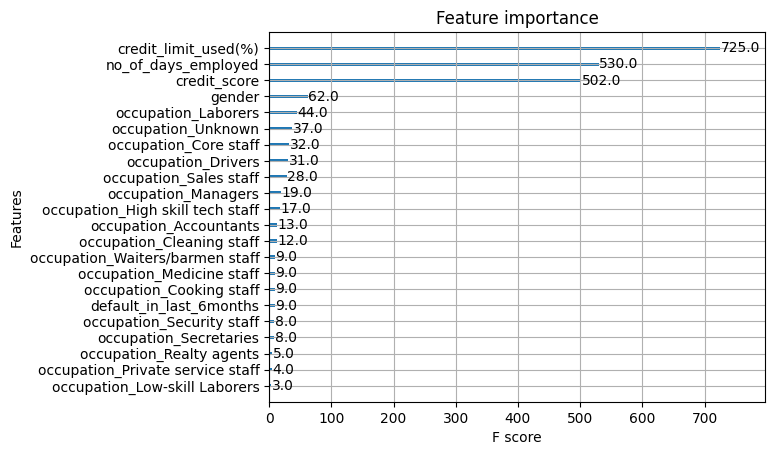

<Figure size 640x480 with 0 Axes>

In [78]:
plot_importance(xgb_model)
plt.show()
plt.savefig("Feature importance.png")

### **KNN**

In [79]:
# # iterating knn model for all values of k from 1-39
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

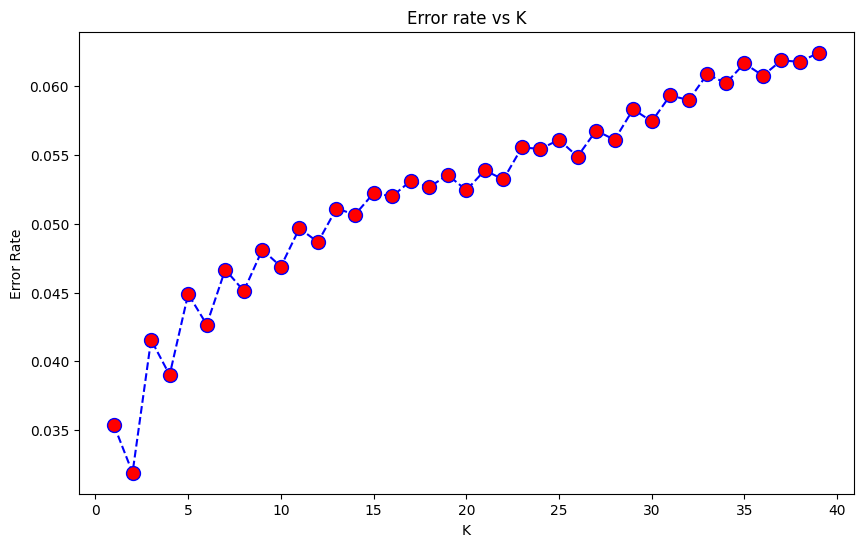

In [80]:
# ploting the error_rate

plt.figure(figsize=[10,6])
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed',
          marker='o', markerfacecolor='red', markersize=10)
plt.title('Error rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

**Choose k = 2**

In [81]:
# # building knn and fit the model
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [82]:
# # Evaluation
evaluation(knn)

========== TRAIN Set Evaluation ==========
Confusion Matrix:
[[19276     0]
 [  243 19033]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19276
           1       1.00      0.99      0.99     19276

    accuracy                           0.99     38552
   macro avg       0.99      0.99      0.99     38552
weighted avg       0.99      0.99      0.99     38552

Accuracy: 99.37%
F1 Score: 99.37%
RMSE: 0.0794
ROC AUC Score: 0.9937
========== TEST Set Evaluation ==========
Confusion Matrix:
[[8066  195]
 [  92  647]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      8261
           1       0.77      0.88      0.82       739

    accuracy                           0.97      9000
   macro avg       0.88      0.93      0.90      9000
weighted avg       0.97      0.97      0.97      9000

Accuracy: 96.81%
F1 Score: 90.05%
RMSE: 0.1786
ROC A

,Set,Accuracy,F1 Score,RMSE,ROC AUC
0,Train,99.369683,99.369657,0.079393,0.993697
1,Test,96.811111,90.049479,0.178575,0.925951


,Set,Accuracy,F1 Score,RMSE,ROC AUC
0,Train,99.369683,99.369657,0.079393,0.993697
1,Test,96.811111,90.049479,0.178575,0.925951


In [ ]:

models = {
    "Logistic Regression": logreg,  
    "Decision Tree": tree_model,
    "Random Forest": regr_rfr,
    "XGBoost": xgb_model,
    "KNN": knn
}

results = []

def evaluate_model(model, model_name):
    metrics = {}
    for dataset, (X, y, label) in zip(['TRAIN', 'TEST'], [(X_train, y_train, 'Train'), (X_test, y_test, 'Test')]):
        y_pred = model.predict(X)
        
        accuracy = accuracy_score(y, y_pred) * 100
        f1 = f1_score(y, y_pred, average="macro") * 100
        rmse = np.sqrt(mean_squared_error(y, y_pred))
        roc_auc = roc_auc_score(y, y_pred)
        
        metrics["Model"] = model_name
        metrics["Data Set"] = label
        metrics["Accuracy"] = accuracy
        metrics["F1 Score"] = f1
        metrics["RMSE"] = rmse
        metrics["ROC AUC"] = roc_auc
        
        results.append(metrics.copy())

for model_name, model in models.items():
    evaluate_model(model, model_name)

final_summary_table = pd.DataFrame(results)

print("\nFinal Summary of All Model Evaluations:")
display(final_summary_table)


Final Summary of All Model Evaluations:


,Model,Data Set,Accuracy,F1 Score,RMSE,ROC AUC
0,Logistic Regression,Train,95.740818,95.740312,0.206378,0.957408
1,Logistic Regression,Test,94.666667,86.007463,0.230940,0.959243
2,Decision Tree,Train,100.000000,100.000000,0.000000,1.000000
3,Decision Tree,Test,96.833333,90.186082,0.177951,0.930385
4,Random Forest,Train,100.000000,100.000000,0.000000,1.000000
5,Random Forest,Test,96.500000,89.508390,0.187083,0.937810
6,XGBoost,Train,99.424154,99.424144,0.075884,0.994242
7,XGBoost,Test,96.933333,90.638991,0.175119,0.942019
8,KNN,Train,99.369683,99.369657,0.079393,0.993697
9,KNN,Test,96.811111,90.049479,0.178575,0.925951
